In [5]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Hitesh
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

**Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
technology, food, books, etc.).**
1. Convert text to lowercase and remove punctua on.

In [7]:
from nltk.tokenize import word_tokenize

text = """I enjoy playing online games because they are fun
and let me connect with friends. Games like Valorant are
great for team play and fast action, while GTA V gives
you a big open world to explore and do missions.
Minecraft is creative—you can build anything you imagine
, alone or with others. Fortnite is exciting too, especially
the survival mode where you try to be the last one standing.
These games are not just for fun, they also help with thinking,
teamwork, and quick decision-making. Playing online games is a
cool way to relax and enjoy time with people around the world."""

lower = text.lower()
words = word_tokenize(lower)

punctuations = ['!', '"', '#', '$', '%', '&', "'", ',', '-',
                '.', ':', ';', '?', '^', '_', '`','~']
tempRes = [word for word in words if word not in punctuations]

# Merging the resultant words into a single string again
res = ""
for word in tempRes:
    res += word
    res += " "
print(res)

i enjoy playing online games because they are fun and let me connect with friends games like valorant are great for team play and fast action while gta v gives you a big open world to explore and do missions minecraft is creative—you can build anything you imagine alone or with others fortnite is exciting too especially the survival mode where you try to be the last one standing these games are not just for fun they also help with thinking teamwork and quick decision-making playing online games is a cool way to relax and enjoy time with people around the world 


2. Tokenize the text into words and sentences.

In [9]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

words = word_tokenize(text)
sentences = sent_tokenize(text)

print("Words:\n")
print(words)
print("\n")

print("Sentences:\n")
for sentence in sentences:
    print(sentence)

Words:

['I', 'enjoy', 'playing', 'online', 'games', 'because', 'they', 'are', 'fun', 'and', 'let', 'me', 'connect', 'with', 'friends', '.', 'Games', 'like', 'Valorant', 'are', 'great', 'for', 'team', 'play', 'and', 'fast', 'action', ',', 'while', 'GTA', 'V', 'gives', 'you', 'a', 'big', 'open', 'world', 'to', 'explore', 'and', 'do', 'missions', '.', 'Minecraft', 'is', 'creative—you', 'can', 'build', 'anything', 'you', 'imagine', ',', 'alone', 'or', 'with', 'others', '.', 'Fortnite', 'is', 'exciting', 'too', ',', 'especially', 'the', 'survival', 'mode', 'where', 'you', 'try', 'to', 'be', 'the', 'last', 'one', 'standing', '.', 'These', 'games', 'are', 'not', 'just', 'for', 'fun', ',', 'they', 'also', 'help', 'with', 'thinking', ',', 'teamwork', ',', 'and', 'quick', 'decision-making', '.', 'Playing', 'online', 'games', 'is', 'a', 'cool', 'way', 'to', 'relax', 'and', 'enjoy', 'time', 'with', 'people', 'around', 'the', 'world', '.']


Sentences:

I enjoy playing online games because they ar

3. Remove stopwords (using NLTK's stopwords list).

In [33]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Using the resultant string from Q1)1. coz that avoids punctuations as well, so it'd provide a better result
token = word_tokenize(res)
stop_words = set(stopwords.words('english'))

resStr = [word for word in token if word not in stop_words]
print(resStr)

['This', 'example', 'sentence', ',', 'punctuation', 'stopwords', '!']


4. Display word frequency distribu on (excluding stopwords).

<FreqDist with 7 samples and 7 outcomes>


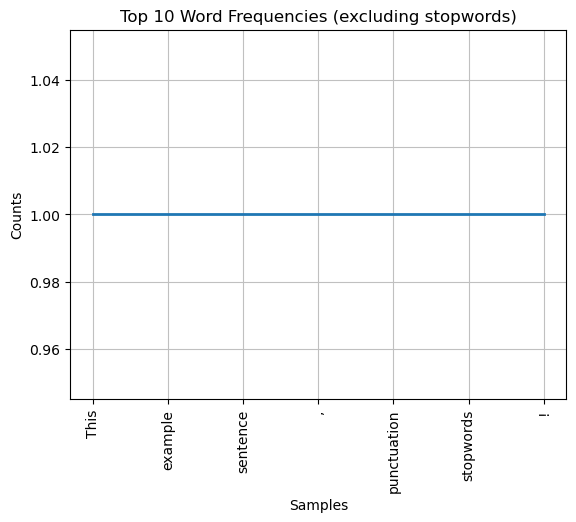

<Axes: title={'center': 'Top 10 Word Frequencies (excluding stopwords)'}, xlabel='Samples', ylabel='Counts'>

In [35]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

# Using output of Q1) 3.
frequency = FreqDist(resStr)
print(frequency)
frequency.plot(10, title="Top 10 Word Frequencies (excluding stopwords)")

**Q2: Stemming and Lemmatization**
1. Take the tokenized words from Ques on 1 (after stopword removal).
2. Apply stemming using NLTK's PorterStemmer and LancasterStemmer.

In [37]:
input = resStr
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()

for word in input:
    print(word, " : ", porter.stem(word))
print("\nLancaster Stemming:\n")
for word in input:
    print(word, " : ", lancaster.stem(word))

This  :  thi
example  :  exampl
sentence  :  sentenc
,  :  ,
punctuation  :  punctuat
stopwords  :  stopword
!  :  !

Lancaster Stemming:

This  :  thi
example  :  exampl
sentence  :  sent
,  :  ,
punctuation  :  punctu
stopwords  :  stopword
!  :  !


3. Apply lemmatization using NLTK's WordNetLemmatizer.

In [42]:
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()

for word in input:
    print(word, " : ", wordnet.lemmatize(word))

This  :  This
example  :  example
sentence  :  sentence
,  :  ,
punctuation  :  punctuation
stopwords  :  stopwords
!  :  !


In [44]:
print(f"{'Original':<12}{'PorterStemmer':<18}{'LancasterStemmer':<18}{'WordNetLemmatizer':<18}")
print("\n")

# Conclusion: The lancaster stemmer is so aggressive than the porter stemmer. It removes a lot of characters and often loses meaning of the
# word. The porter stemmer is less aggressive but it still lacks precision in some cases.
# The WordNetStemmer on the other hand is so accurate coz it looks up the word on web and then perform stemming precisely. Like, you can see
# in the word "valorant", the porter gave "valor" lancaster gave "val" but wn gave "valorant" which is the actual name of the game. It
# maintained the context of the word.

for word in input:
    p_stem = porter.stem(word)
    l_stem = lancaster.stem(word)
    w_stem = wordnet.lemmatize(word)
    print(f"{word:<12}{p_stem:<18}{l_stem:<18}{w_stem:<18}")

Original    PorterStemmer     LancasterStemmer  WordNetLemmatizer 


This        thi               thi               This              
example     exampl            exampl            example           
sentence    sentenc           sent              sentence          
,           ,                 ,                 ,                 
punctuation punctuat          punctu            punctuation       
stopwords   stopword          stopword          stopwords         
!           !                 !                 !                 


**Q3. Regular Expressions and Text Splittng**
1. Take their original text from Ques on 1.
2. Use regular expressions to:<br>
a. Extract all words with more than 5 letters.<br>
b. Extract all numbers (if any exist in their text).<br>
c. Extract all capitalized words.<br>

In [46]:
import re
ip = text

resA = re.findall(r'\w{6,}', ip)
print(resA)

# Adding numbers for testing command
ip += "1234"
resB = re.findall(r'\d+', ip)
print(resB)

resC = re.findall(r'\b[A-Z]+\b', ip)
print(resC)

['playing', 'online', 'because', 'connect', 'friends', 'Valorant', 'action', 'explore', 'missions', 'Minecraft', 'creative', 'anything', 'imagine', 'others', 'Fortnite', 'exciting', 'especially', 'survival', 'standing', 'thinking', 'teamwork', 'decision', 'making', 'Playing', 'online', 'people', 'around']
['1234']
['I', 'GTA', 'V']


3. Use text splittng techniques to:<br>
a. Split the text into words containing only alphabets (removing digits and special
characters).<br>
b. Extract words starting with a vowel.

In [48]:
ip3 = text

# Filtering all the alphabets
non_digits = re.findall(r'\b[a-zA-Z]+\b', ip3)
# Filtering out words only to avoid punctuation, digits and special characters
words_only = re.findall(r'\b\w+\b', ip3)

words_only_set = set(words_only)
res3a = [word for word in non_digits if word in words_only_set]
print(res3a)

res3b = re.findall(r'\b[aeiouAEIOU]\w*', text)
print("\nVowels only\n")
print(res3b)

['I', 'enjoy', 'playing', 'online', 'games', 'because', 'they', 'are', 'fun', 'and', 'let', 'me', 'connect', 'with', 'friends', 'Games', 'like', 'Valorant', 'are', 'great', 'for', 'team', 'play', 'and', 'fast', 'action', 'while', 'GTA', 'V', 'gives', 'you', 'a', 'big', 'open', 'world', 'to', 'explore', 'and', 'do', 'missions', 'Minecraft', 'is', 'creative', 'you', 'can', 'build', 'anything', 'you', 'imagine', 'alone', 'or', 'with', 'others', 'Fortnite', 'is', 'exciting', 'too', 'especially', 'the', 'survival', 'mode', 'where', 'you', 'try', 'to', 'be', 'the', 'last', 'one', 'standing', 'These', 'games', 'are', 'not', 'just', 'for', 'fun', 'they', 'also', 'help', 'with', 'thinking', 'teamwork', 'and', 'quick', 'decision', 'making', 'Playing', 'online', 'games', 'is', 'a', 'cool', 'way', 'to', 'relax', 'and', 'enjoy', 'time', 'with', 'people', 'around', 'the', 'world']

Vowels only

['I', 'enjoy', 'online', 'are', 'and', 'are', 'and', 'action', 'a', 'open', 'explore', 'and', 'is', 'anyth

**Q4. Custom Tokeniza on & Regex-based Text Cleaning**
1. Take original text from Question 1.
2. Write a custom tokeniza on function that:<br>
a. Removes punctua on and special symbols, but keeps contrac ons (e.g.,
"isn't" should not be split into "is" and "n't").<br>
b. Handles hyphenated words as a single token (e.g., "state-of-the-art" remains
a single token).<br>
c. Tokenizes numbers separately but keeps decimal numbers intact (e.g., "3.14"
should remain as is).

In [50]:
input4 = text

def custom_tokenization_a(text):
    tokens = re.findall(r"\w+|\w+'\w", text)
    return tokens
def custom_tokenization_b(text):
    tokens = re.findall(r"\w+(?:-\w+)+", text)
    return tokens
def custom_tokenization_c(text):
    tokens = re.findall(r"\d+\.\d+|\d+", text)
    return tokens

ress_a = custom_tokenization_a(input4)
# Adding the required inputs within the text to check the output
ress_b = custom_tokenization_b(input4 + " state-of-the-art")
ress_c = custom_tokenization_c(input4 + " 3.14 14.294 52")

print("Removing unctuation and special symbols:", ress_a)
print("\nHyphenated words:\n", ress_b)
print("Decimal numbers:\n", ress_c)

Removing unctuation and special symbols: ['I', 'enjoy', 'playing', 'online', 'games', 'because', 'they', 'are', 'fun', 'and', 'let', 'me', 'connect', 'with', 'friends', 'Games', 'like', 'Valorant', 'are', 'great', 'for', 'team', 'play', 'and', 'fast', 'action', 'while', 'GTA', 'V', 'gives', 'you', 'a', 'big', 'open', 'world', 'to', 'explore', 'and', 'do', 'missions', 'Minecraft', 'is', 'creative', 'you', 'can', 'build', 'anything', 'you', 'imagine', 'alone', 'or', 'with', 'others', 'Fortnite', 'is', 'exciting', 'too', 'especially', 'the', 'survival', 'mode', 'where', 'you', 'try', 'to', 'be', 'the', 'last', 'one', 'standing', 'These', 'games', 'are', 'not', 'just', 'for', 'fun', 'they', 'also', 'help', 'with', 'thinking', 'teamwork', 'and', 'quick', 'decision', 'making', 'Playing', 'online', 'games', 'is', 'a', 'cool', 'way', 'to', 'relax', 'and', 'enjoy', 'time', 'with', 'people', 'around', 'the', 'world']

Hyphenated words:
 ['decision-making', 'state-of-the-art']
Decimal numbers:
 [

3. Use Regex Substitutions (re.sub) to:
a. Replace email addresses with '\<EMAIL>' placeholder.<br>
b. Replace URLs with '\<URL>' placeholder.<br>
c. Replace phone numbers (formats: 123-456-7890 or +91 9876543210) with
'\<PHONE>' placeholder.

In [52]:
res43a = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', '<EMAIL>', input4 + "sanyogsethi.dev@gmail.com --End of document--")
print(res43a, "\n")

res43b = re.sub(r'https?://[^\s]+', '<URL> ', input4 + "https://github.com/SanyogSethi --End of document--")
print(res43b, "\n")

res43c = re.sub(r'\b\d{3}-\d{3}-\d{4}\b', '<PHONE>', input4 + "981-430-6110 +91 9814306110 --End of document--")
res43c = re.sub(r'\+91\s\d{10}\b', '<PHONE>', res43c)
print(res43c)

I enjoy playing online games because they are fun
and let me connect with friends. Games like Valorant are
great for team play and fast action, while GTA V gives
you a big open world to explore and do missions.
Minecraft is creative—you can build anything you imagine
, alone or with others. Fortnite is exciting too, especially
the survival mode where you try to be the last one standing.
These games are not just for fun, they also help with thinking,
teamwork, and quick decision-making. Playing online games is a
cool way to relax and enjoy time with people around the <EMAIL> --End of document-- 

I enjoy playing online games because they are fun
and let me connect with friends. Games like Valorant are
great for team play and fast action, while GTA V gives
you a big open world to explore and do missions.
Minecraft is creative—you can build anything you imagine
, alone or with others. Fortnite is exciting too, especially
the survival mode where you try to be the last one standing.
These g